In [15]:
#importing necessary libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("merged.csv")

In [3]:
df = df.sort_values(by=['customer_id'])

In [4]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19968.0,1740.254307,1009.819066,1.00,861.75,1739.50,2614.25,3500.00
past_3_years_bike_related_purchases,19968.0,48.757412,28.611359,0.00,24.00,48.00,73.00,99.00
tenure,19968.0,10.689052,5.611093,1.00,6.00,11.00,15.00,22.00
postcode,19968.0,2987.623347,851.306647,2000.00,2200.00,2767.00,3754.00,4883.00
property_valuation,19968.0,7.516376,2.824783,1.00,6.00,8.00,10.00,12.00
transaction_id,19968.0,9997.846504,5773.929973,1.00,4997.75,9996.50,14996.25,20000.00
product_id,19968.0,45.365986,30.750115,0.00,18.00,44.00,72.00,100.00
online_order,19968.0,0.501102,0.500011,0.00,0.00,1.00,1.00,1.00
list_price,19968.0,1107.780004,582.852548,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19794.0,556.082756,405.798188,7.21,215.14,507.58,795.10,1759.85


In [9]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [10]:
#Filling missing values
df['last_name'].fillna(method='ffill', inplace = True) 
df['dob'].fillna(method='ffill', inplace = True)
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [11]:
df.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [12]:
df['dob'] = df['dob'].apply(pd.to_datetime)

In [13]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [14]:
#Creating an age column
ref_date = dt.datetime.now() #Current date
df['Age'] = df['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [16]:
df = df[df.Age < 100]

In [17]:
#Creating a column of transaction month
df['transaction_month'] = pd.DatetimeIndex(df['dob']).month

In [18]:
#Creating a profit column
df['profit'] = df['list_price'] - df['standard_cost']

In [19]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,70,10,189.28
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,70,10,75.75
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,70,10,509.97
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Solex,Standard,medium,medium,1577.53,826.51,39526.0,70,10,751.02
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,70,10,709.34


**Data Visualisation**

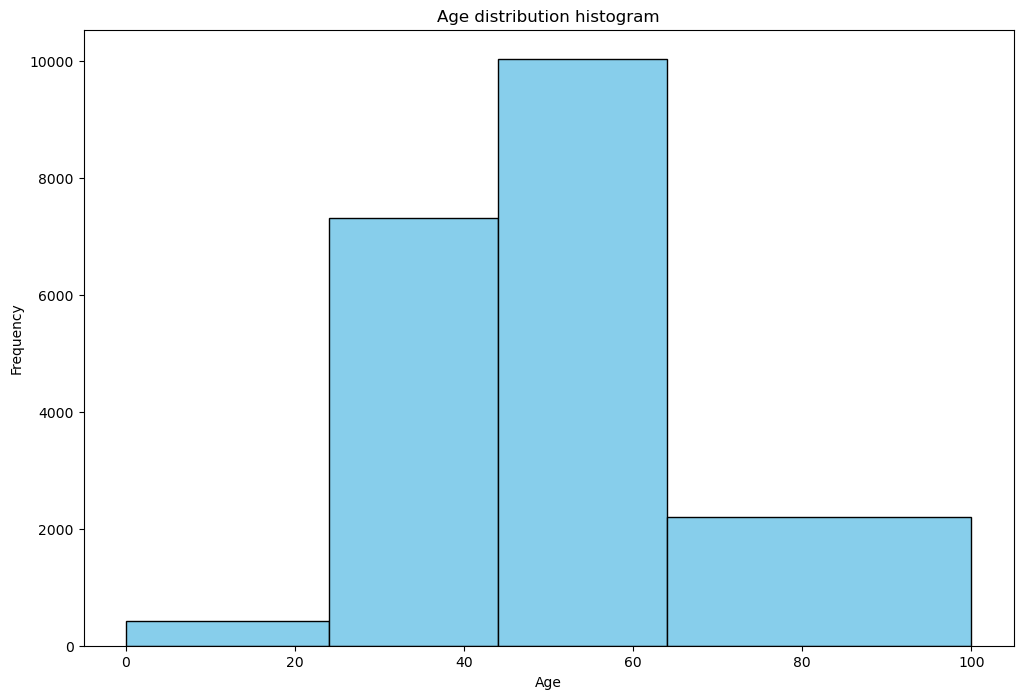

In [21]:
plt.figure(figsize = (12,8))
plt.hist(df['Age'], color = 'skyblue', edgecolor = 'black', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution_histogram.png')
plt.show()

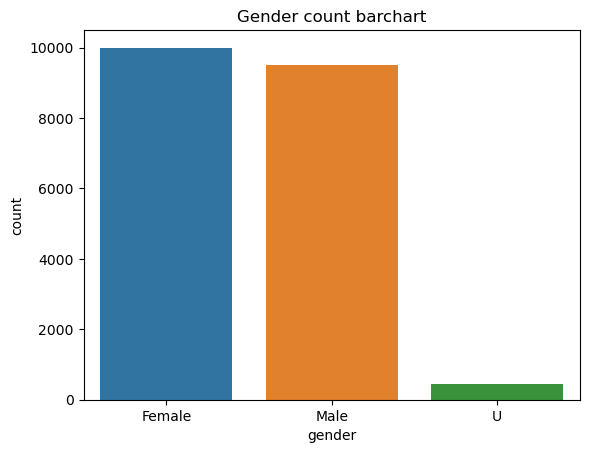

In [22]:
sn.countplot(x = 'gender', data = df)
plt.title('Gender count barchart')
plt.savefig('gender_count_original.png')
plt.show()

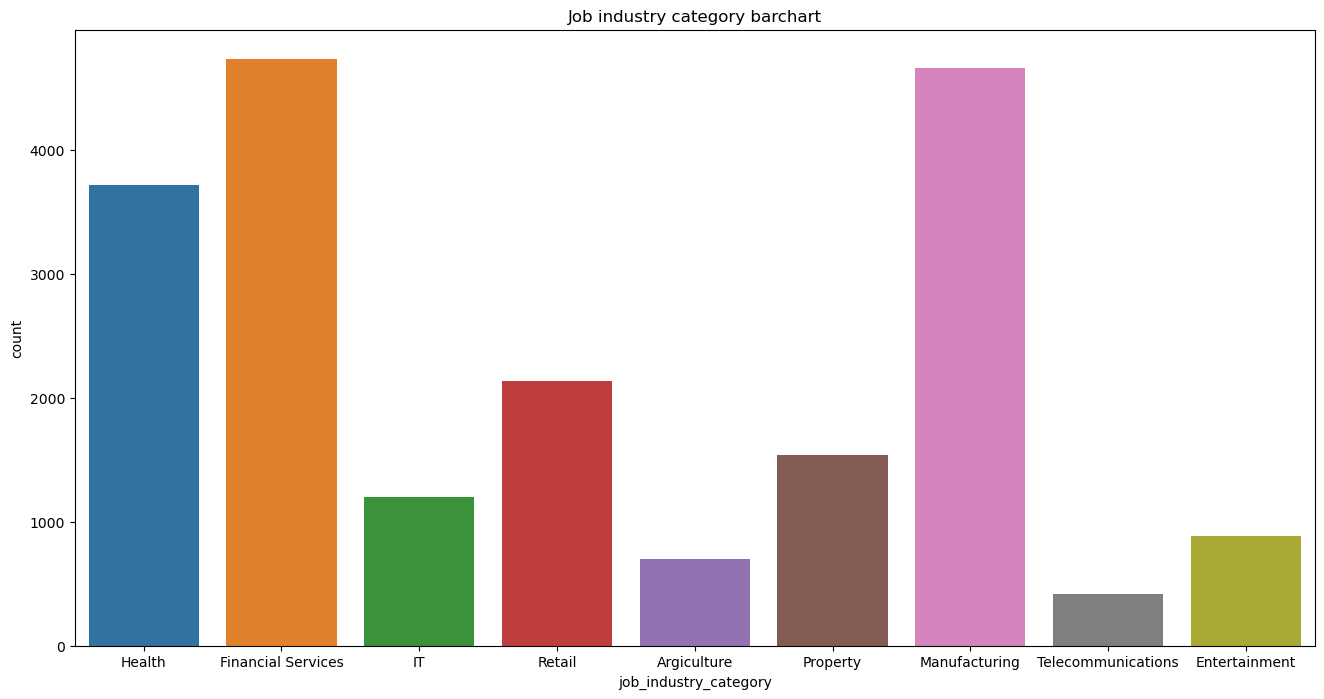

In [23]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df)
plt.title('Job industry category barchart')
plt.savefig('job_industry_original.png')
plt.show()

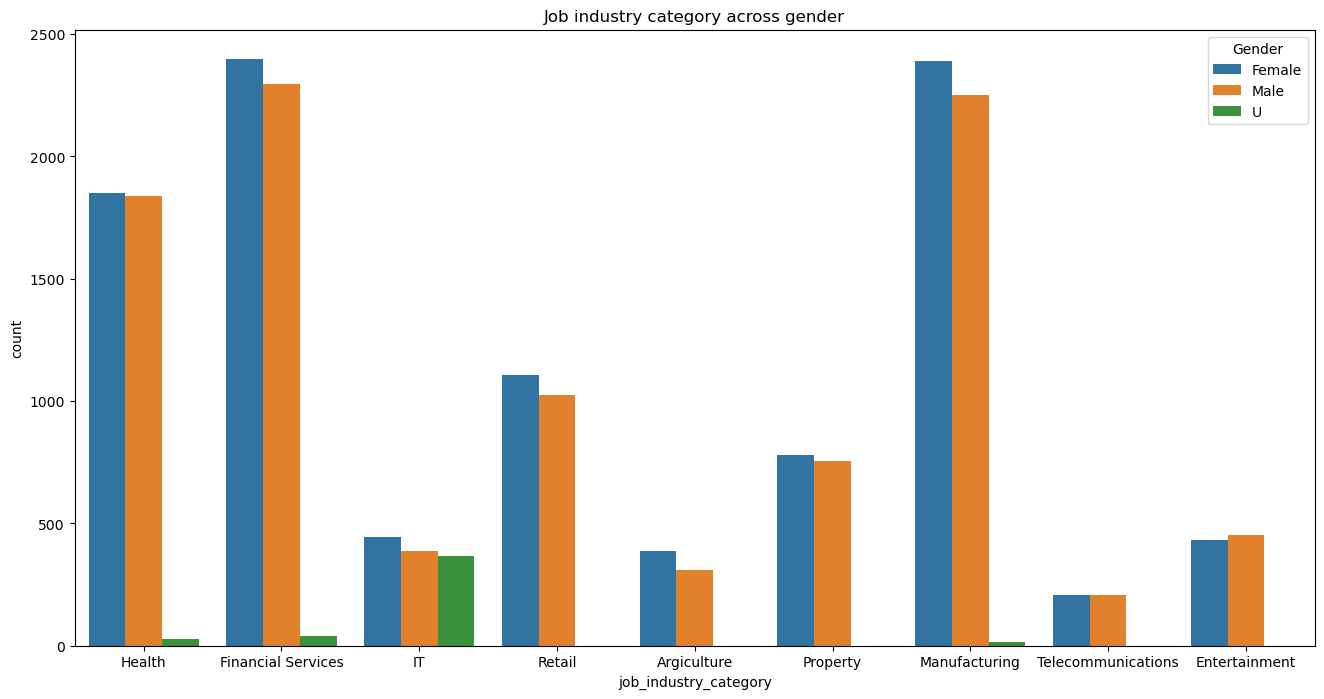

In [24]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

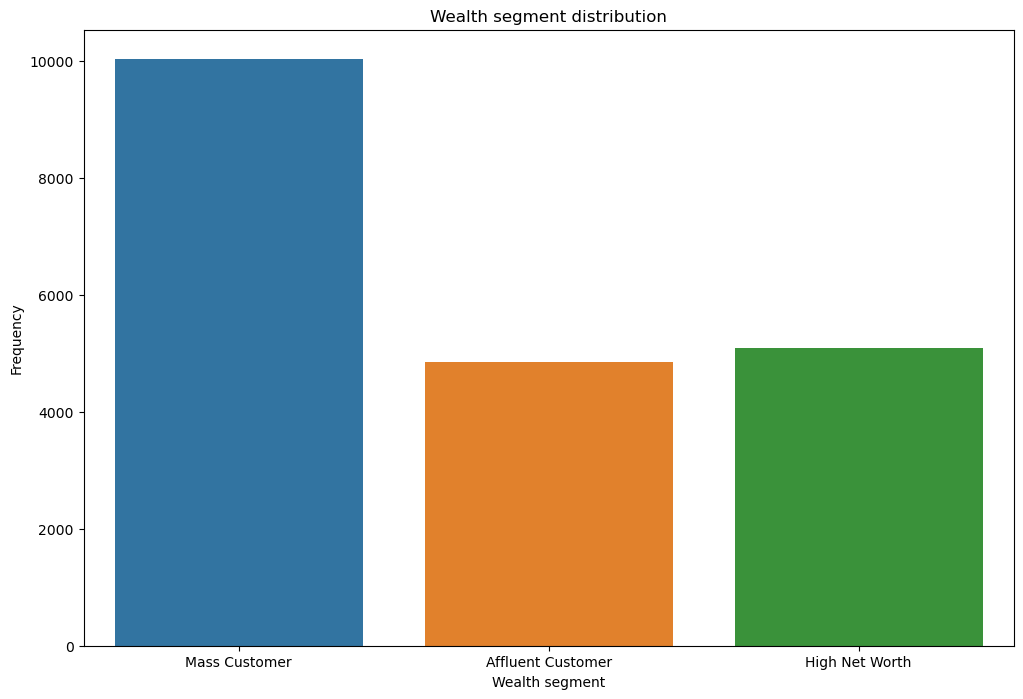

In [25]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_original.png')
plt.show()

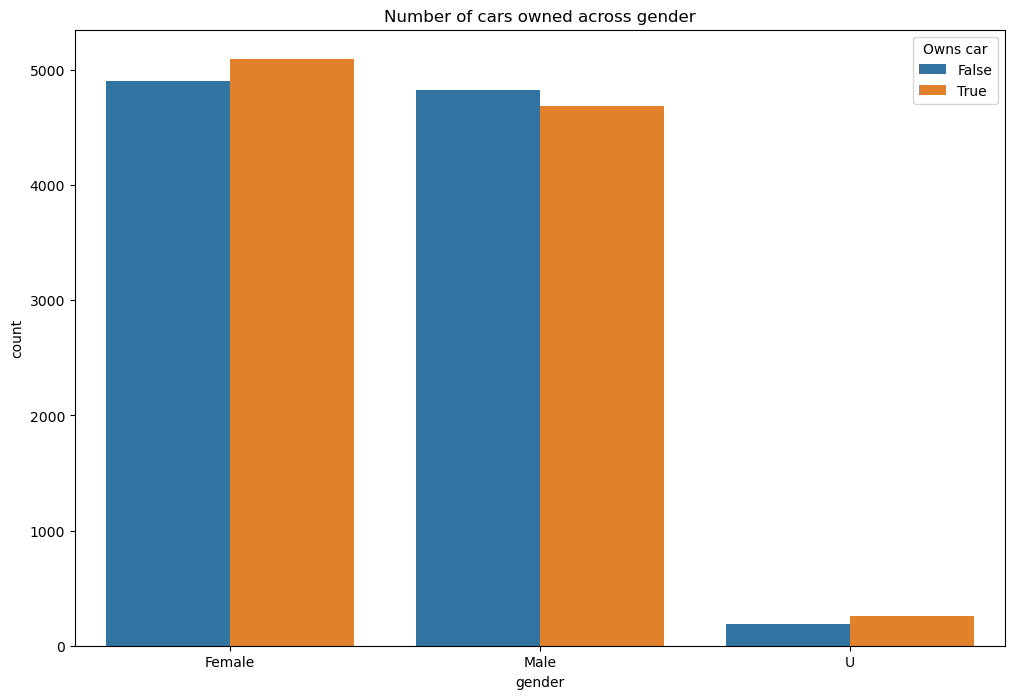

In [26]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_original.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

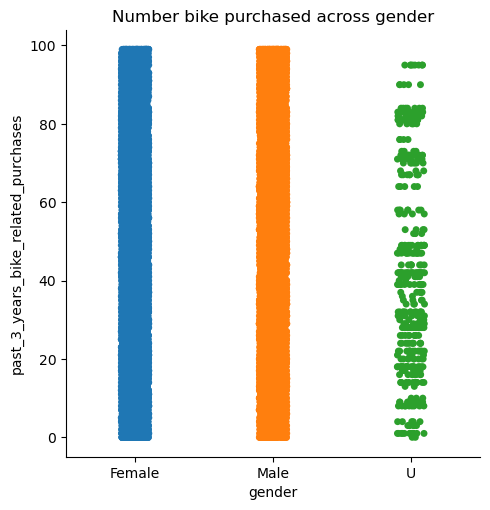

In [27]:
plt.figure(figsize = (12,8))
sn.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_original.png')
plt.show()

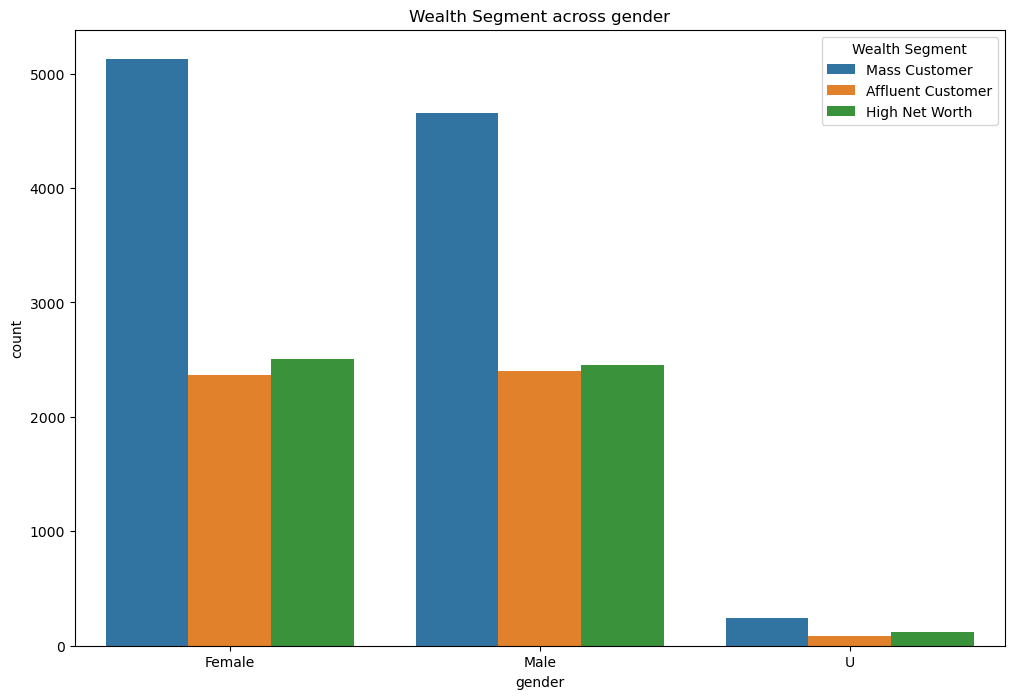

In [28]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_original.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

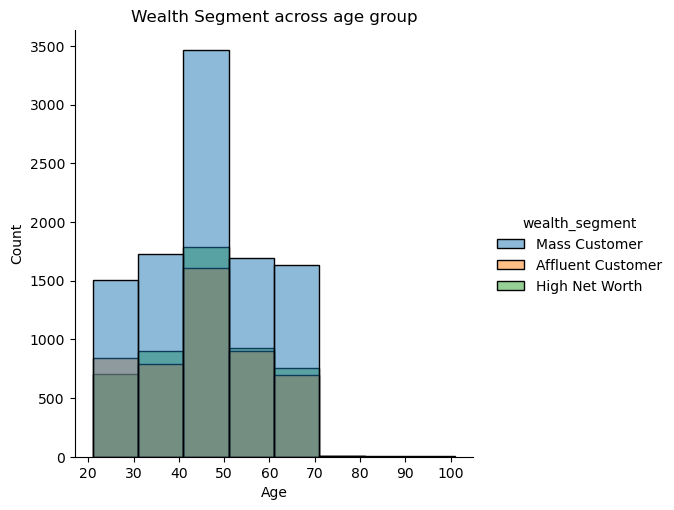

In [29]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_original.png')
plt.show()

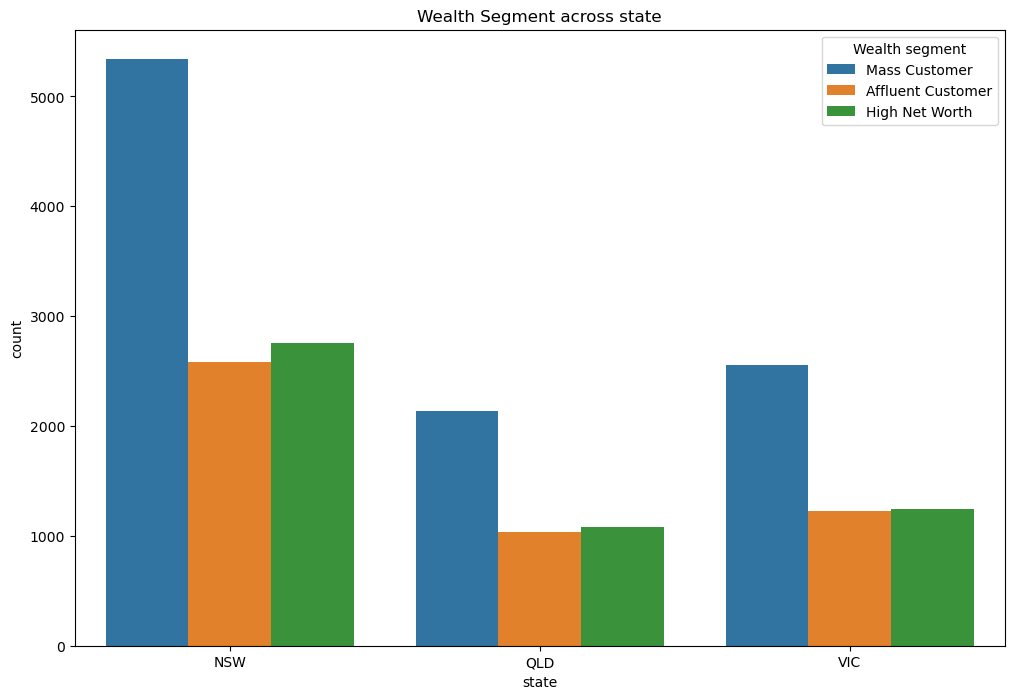

In [30]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_original.png')
plt.show()

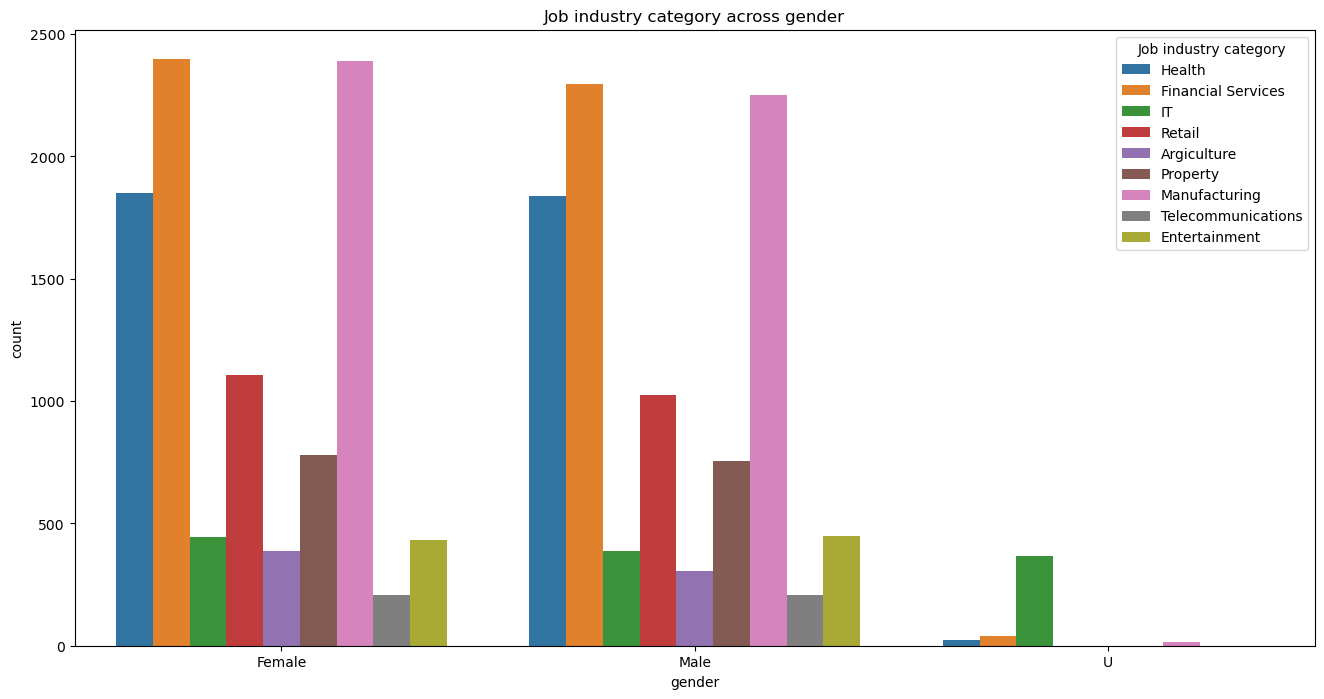

In [31]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df, hue='job_industry_category', order = df['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

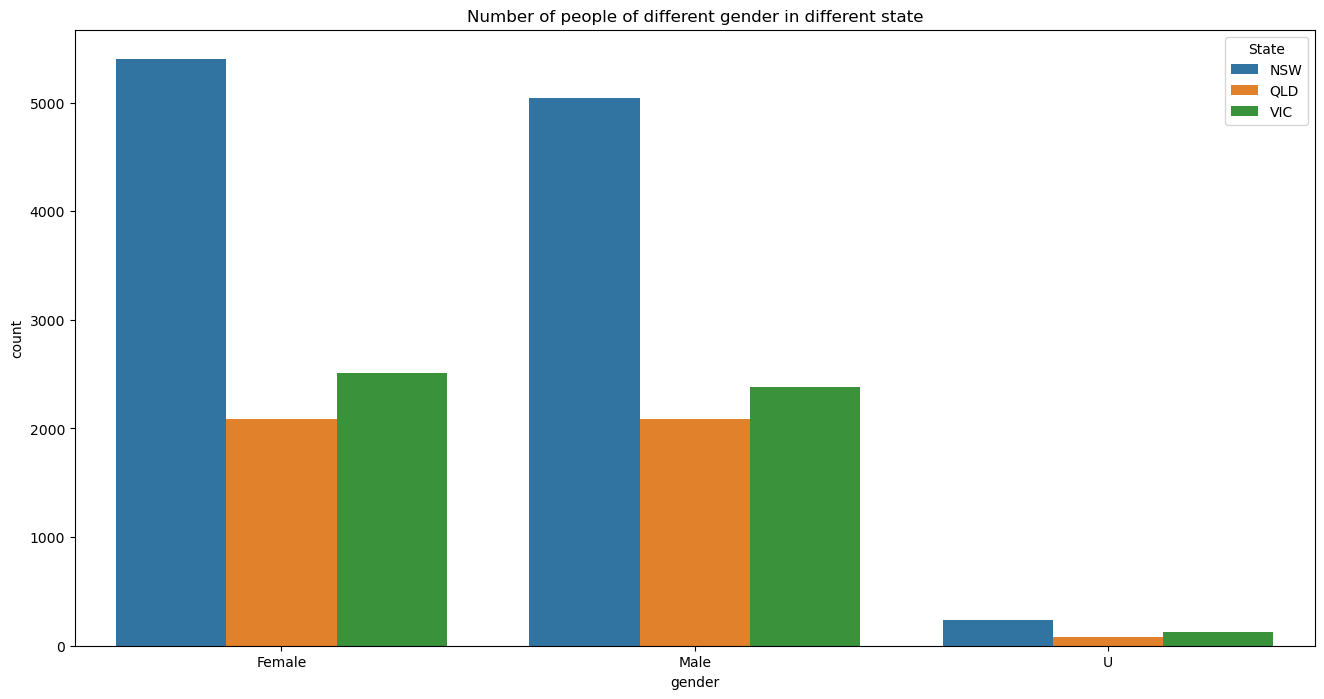

In [32]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_original.png')
plt.show()

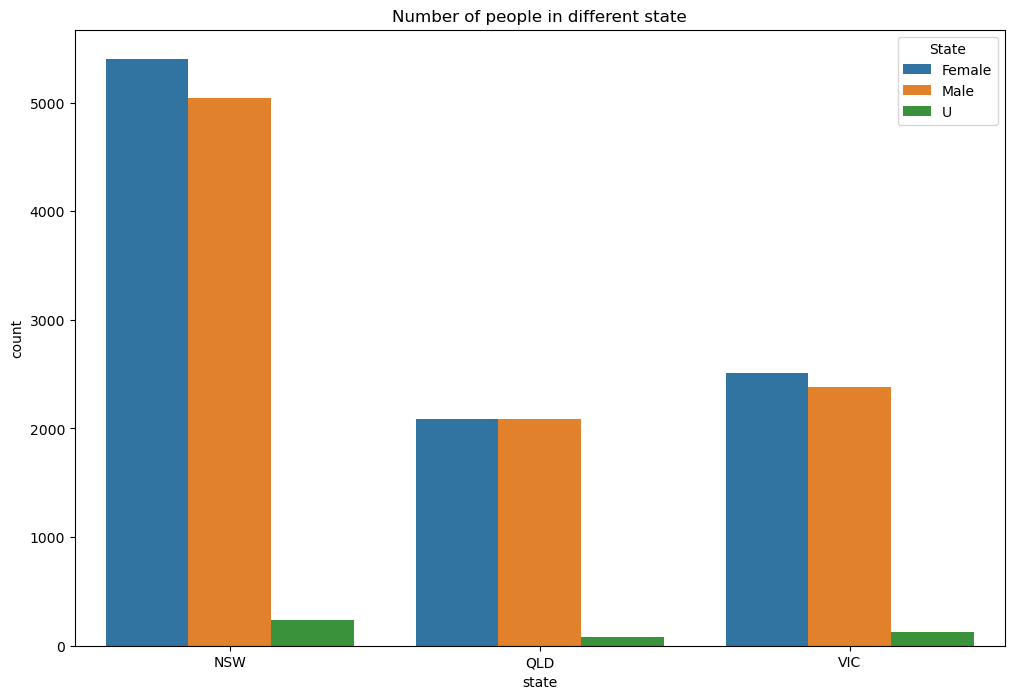

In [33]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_original.png')
plt.show()

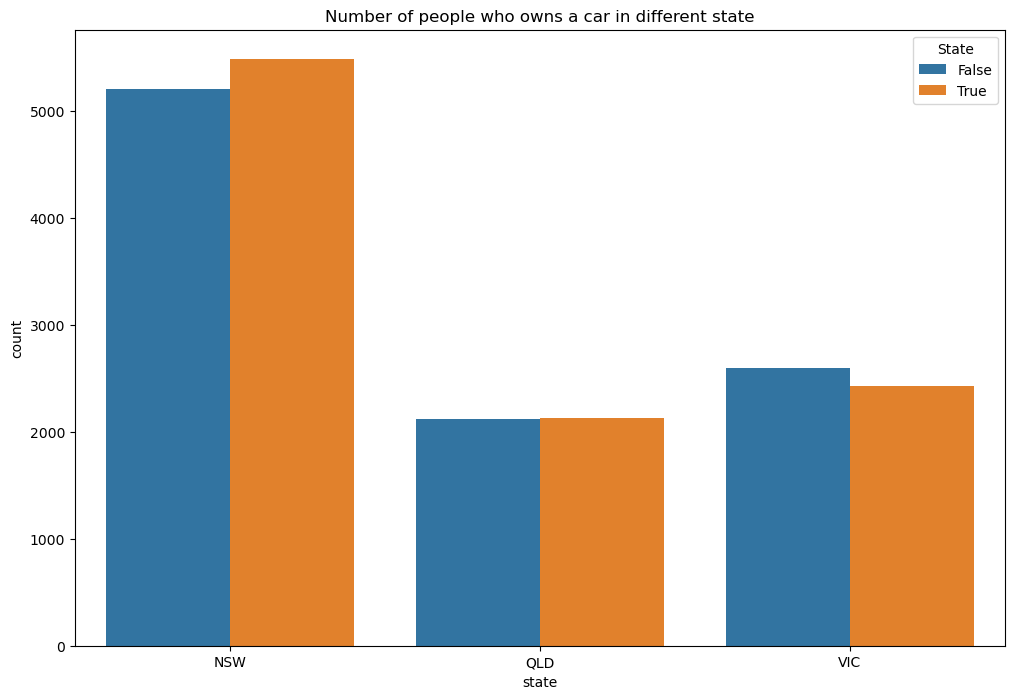

In [34]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.savefig('owns_car-state_original.png')
plt.show()

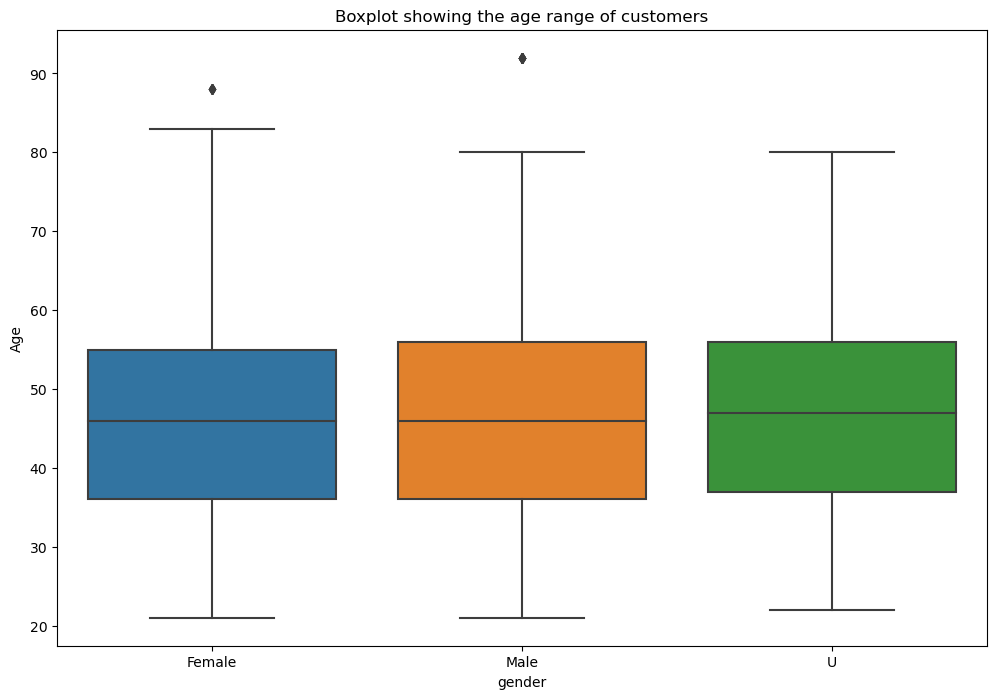

In [35]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df['gender'], y = df['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_original.png')
plt.show()

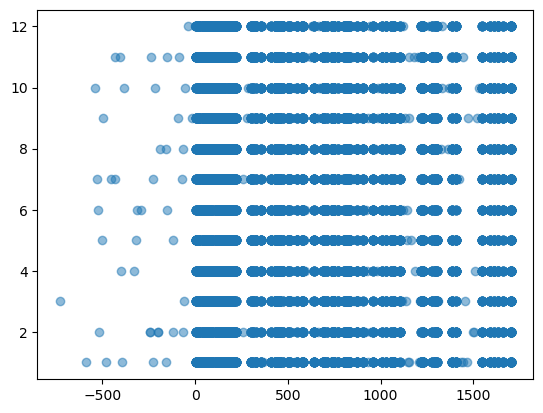

In [36]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)
colors=np.random.rand()
plt.show()

In [37]:
df2 = pd.read_csv('new customer list.csv')

In [38]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,12/07/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,22/03/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,28/08/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,28/01/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,21/09/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,07/10/1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
996,Burk,Wortley,Male,22,17/10/2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
997,Melloney,Temby,Female,17,05/10/1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
998,Dickie,Cubbini,Male,30,17/12/1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  983 non-null    object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [40]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
past_3_years_bike_related_purchases,1000.0,49.836000,27.796686,0.00,26.7500,51.00,72.000,99.000
tenure,1000.0,11.388000,5.037145,0.00,7.0000,11.00,15.000,22.000
postcode,1000.0,3019.227000,848.895767,2000.00,2209.0000,2800.00,3845.500,4879.000
property_valuation,1000.0,7.397000,2.758804,1.00,6.0000,8.00,9.000,12.000
rank,1000.0,498.819000,288.810997,1.00,250.0000,500.00,750.250,1000.000
value,1000.0,0.881722,0.293550,0.34,0.6495,0.86,1.075,1.719


In [41]:
df2.duplicated().sum()

0

In [42]:
df2.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
dob                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
rank                                    0
value                                   0
dtype: int64

In [43]:
df2['new_id'] = df2.index

In [44]:
df2['dob'] = pd.to_datetime(df2['dob'], errors='coerce')

In [45]:
df2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
rank                                            int64
value                                         float64
new_id                      

In [46]:
df2['dob'] = df2['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [47]:
df2['dob'].astype('datetime64')

0     1957-12-07
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-07-10
996   2001-10-17
997   1954-05-10
998   1952-12-17
999   1955-02-10
Name: dob, Length: 1000, dtype: datetime64[ns]

In [48]:
df2['dob'] = df2['dob'].fillna(df2['dob'].mode())

In [49]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [50]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,new_id,Age
0,Chickie,Brister,Male,86,1957-12-07,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,0,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,1,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,2,49.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,3,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,4,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-07-10,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,995,64.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,996,22.0
997,Melloney,Temby,Female,17,1954-05-10,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,997,69.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,998,71.0


In [51]:
df2 = df2[df2.Age < 100]

**Data Visualisation**

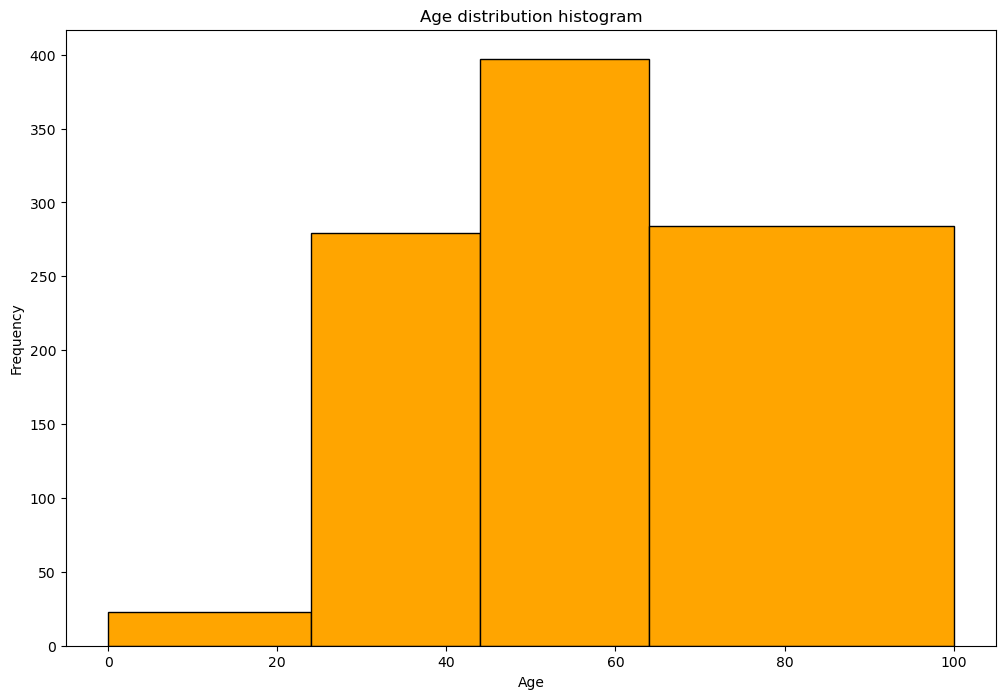

In [52]:
plt.figure(figsize = (12,8))
plt.hist(df2['Age'], color = 'orange', edgecolor = 'black', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram2.png')
plt.show()

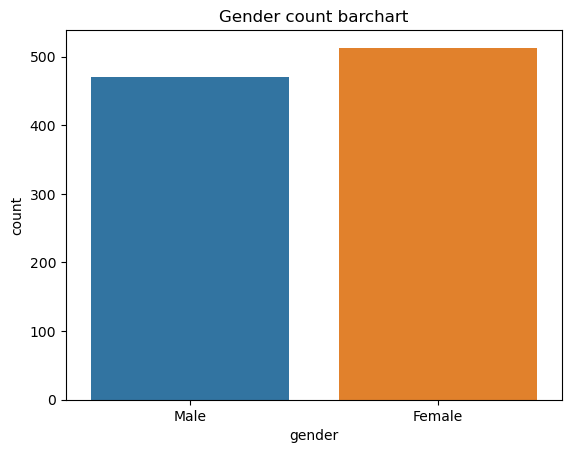

In [53]:
sn.countplot(x = 'gender', data = df2)
plt.title('Gender count barchart')
plt.savefig('gender_count_new.png')
plt.show()

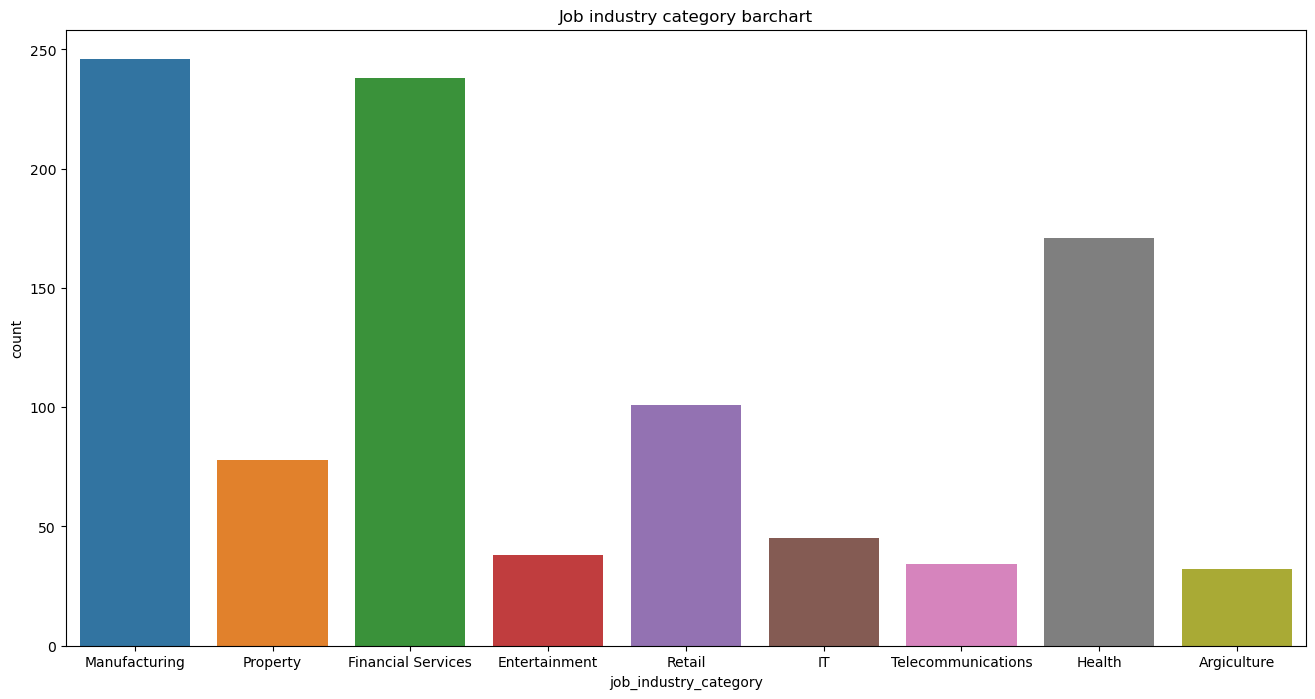

In [54]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df2)
plt.title('Job industry category barchart')
plt.savefig('job_industry_new.png')
plt.show()

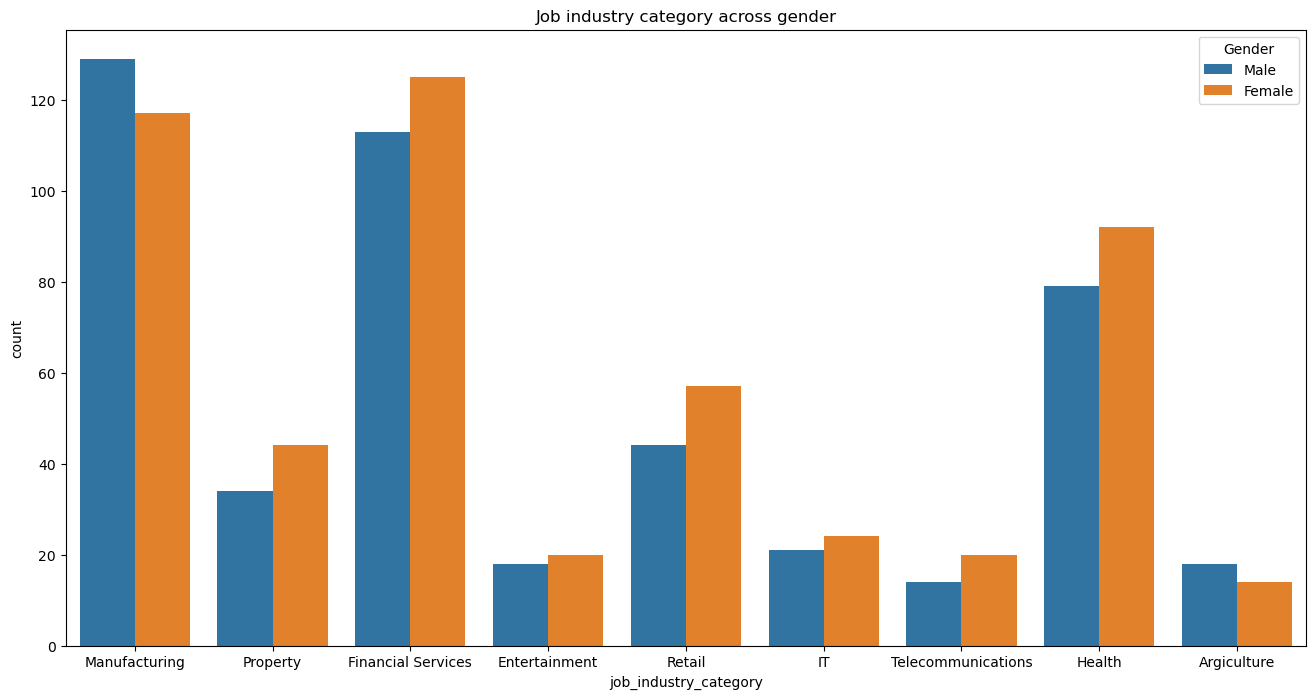

In [55]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df2, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

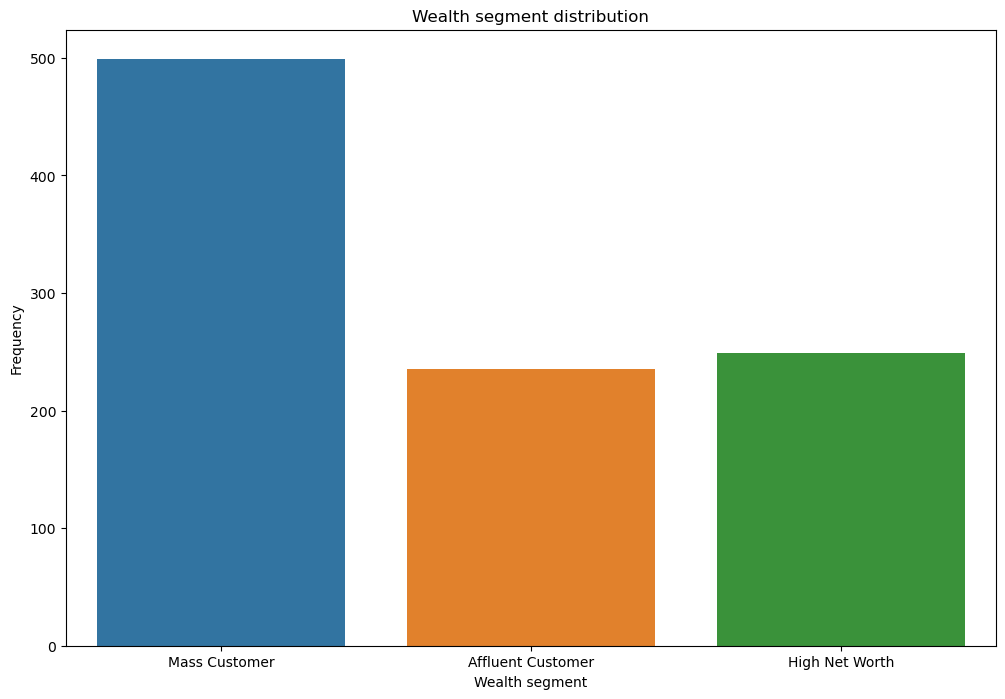

In [56]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df2)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_new.png')
plt.show()

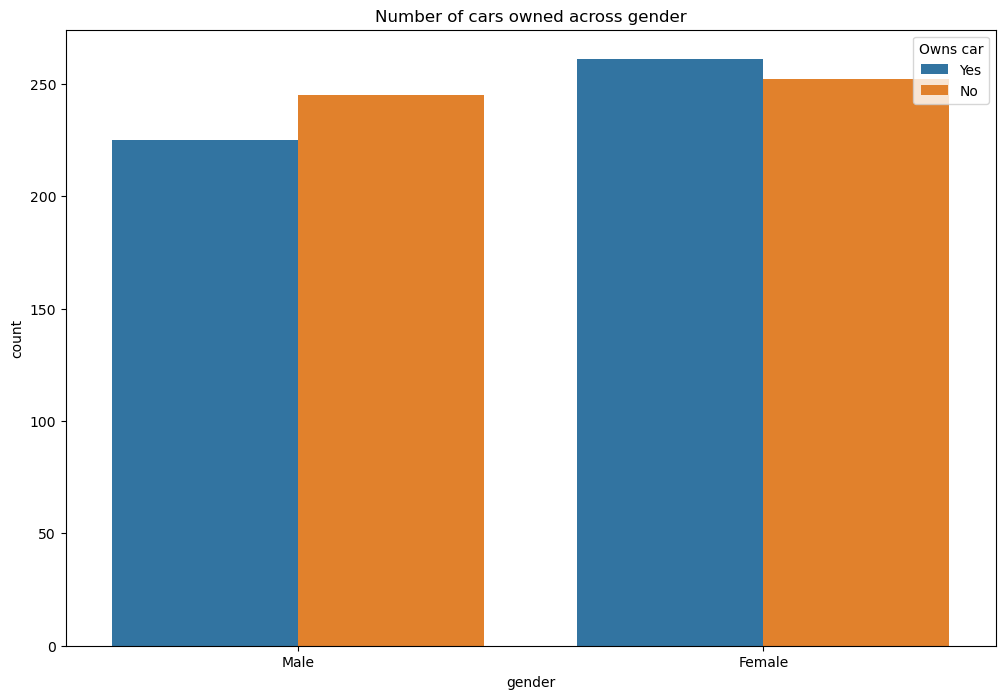

In [57]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_new.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

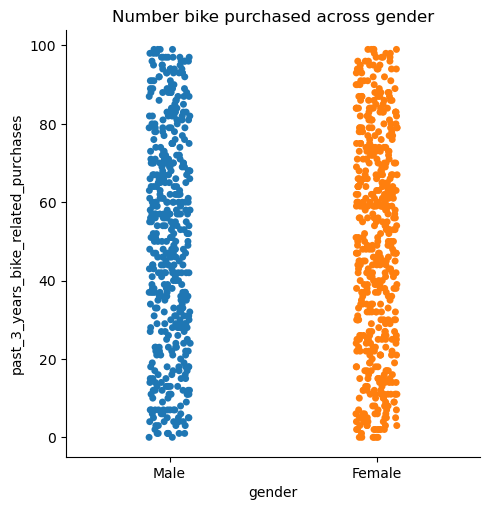

In [58]:
plt.figure(figsize = (12,8))
sn.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_new.png')
plt.show()

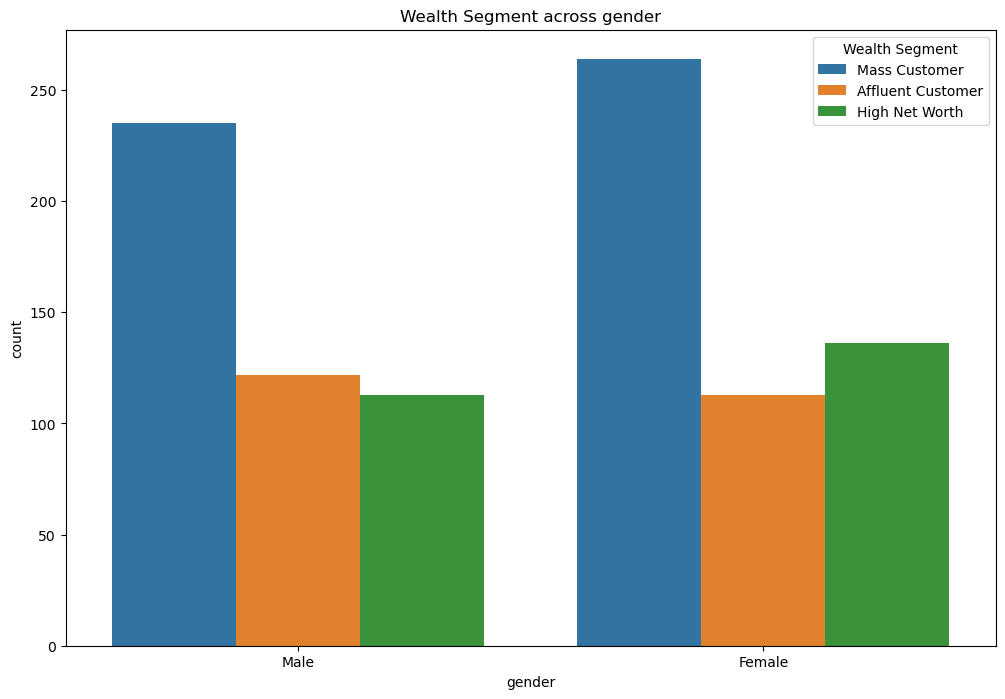

In [59]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_new.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

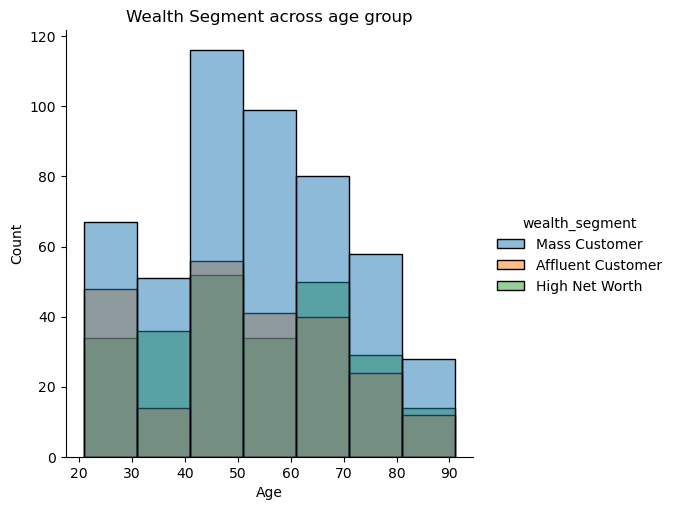

In [60]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_new.png')
plt.show()

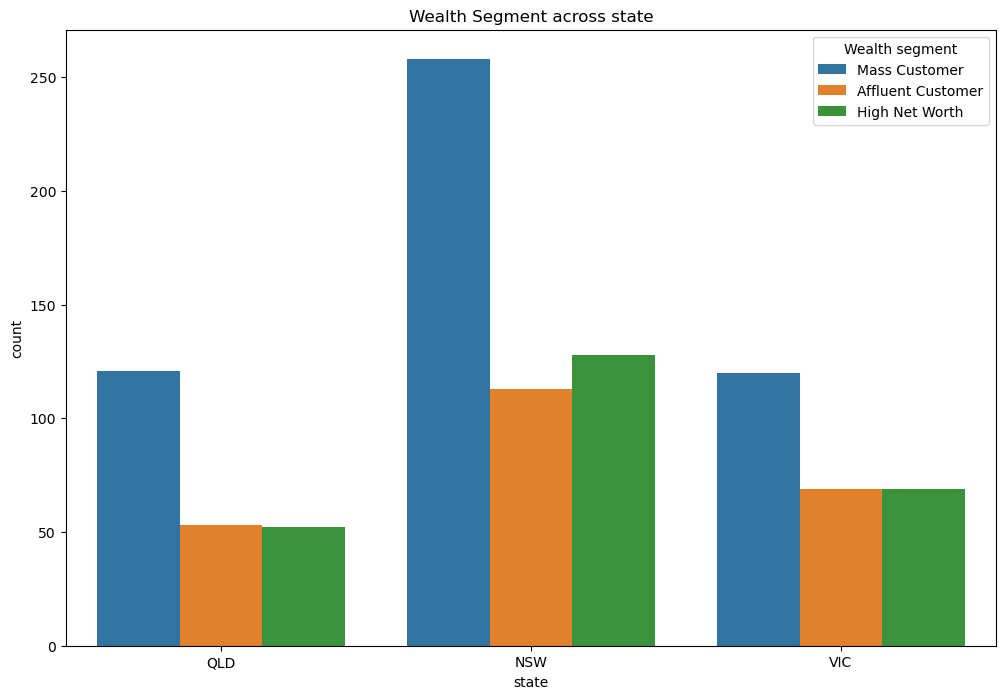

In [61]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df2, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_new.png')
plt.show()

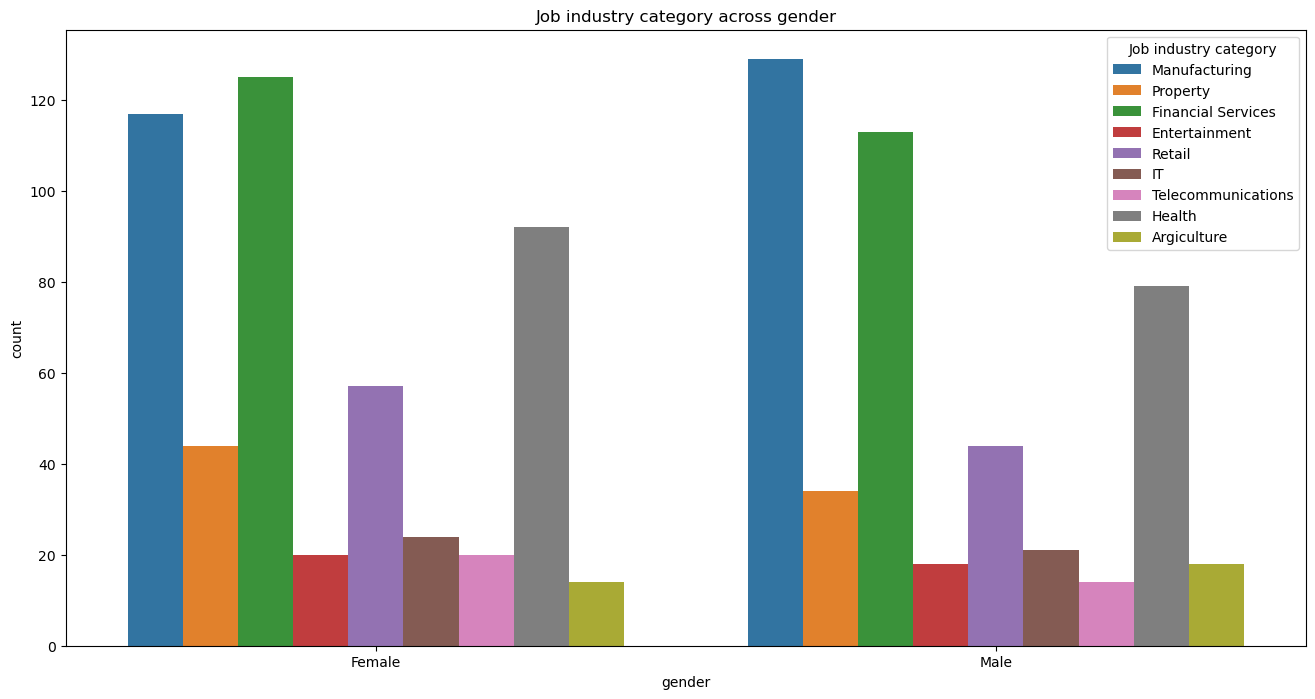

In [62]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df2, hue='job_industry_category', order = df2['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

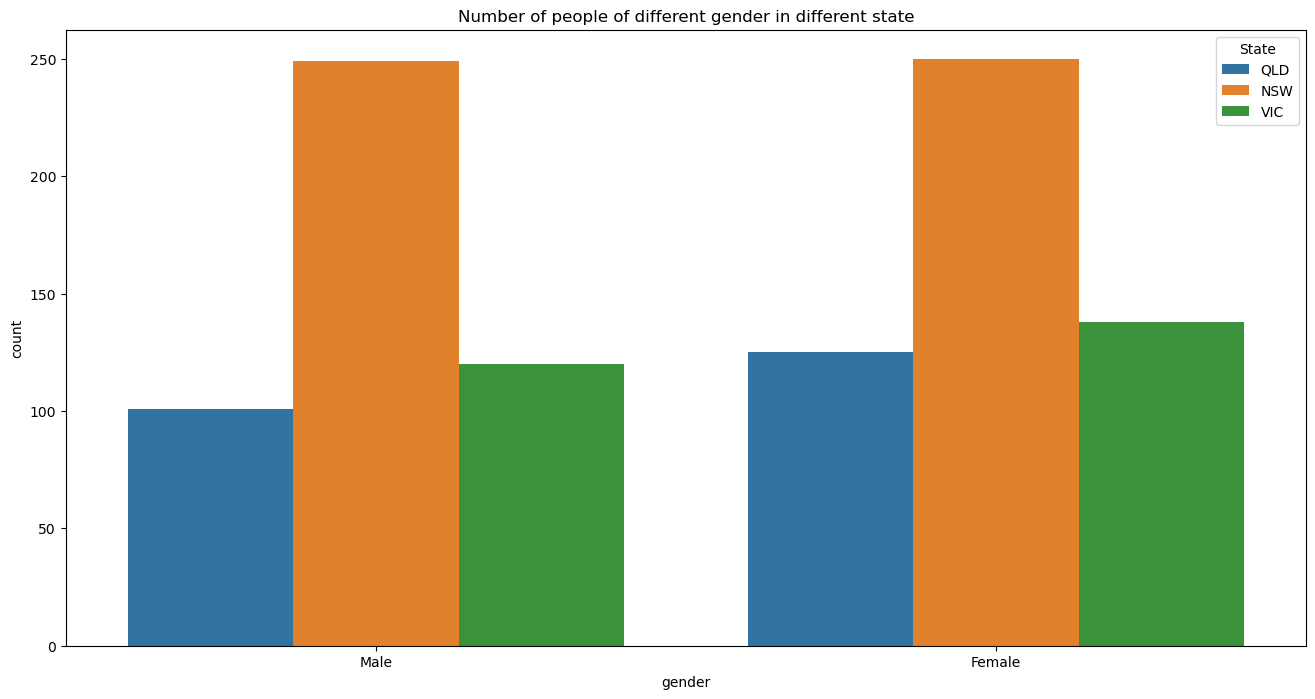

In [63]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df2, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_new.png')
plt.show()

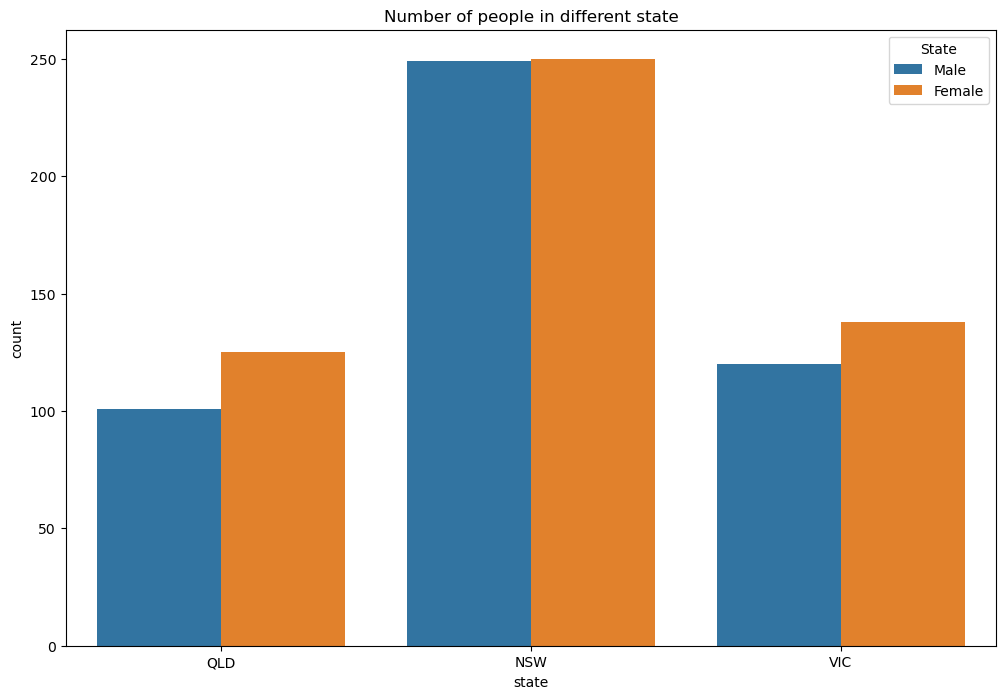

In [64]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df2, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_new.png')
plt.show()

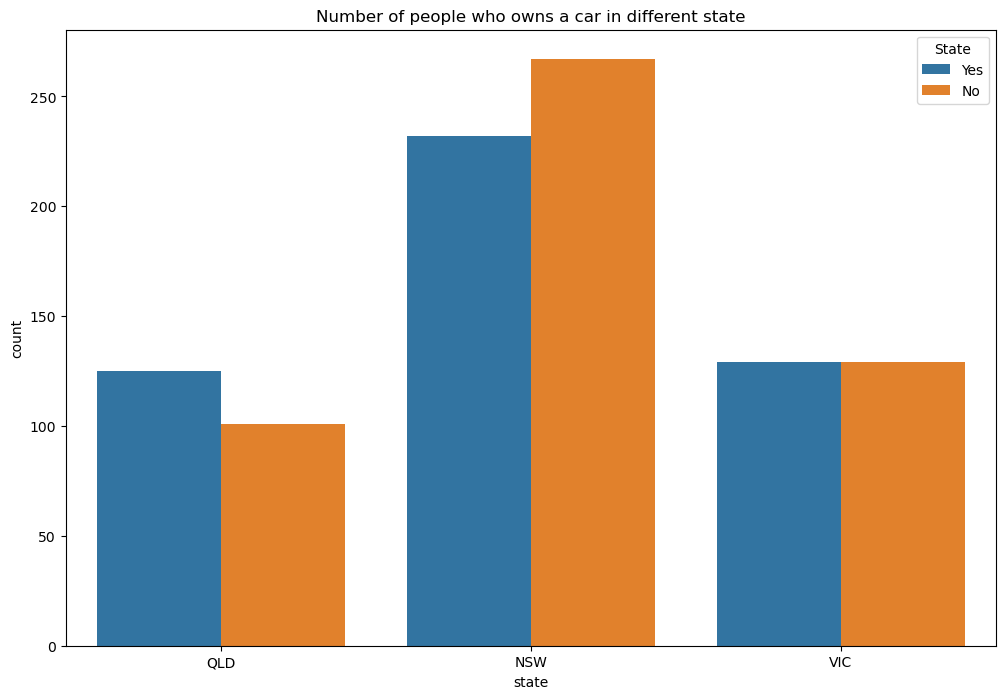

In [65]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df2, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.savefig('owns_car-state_new.png')
plt.show()

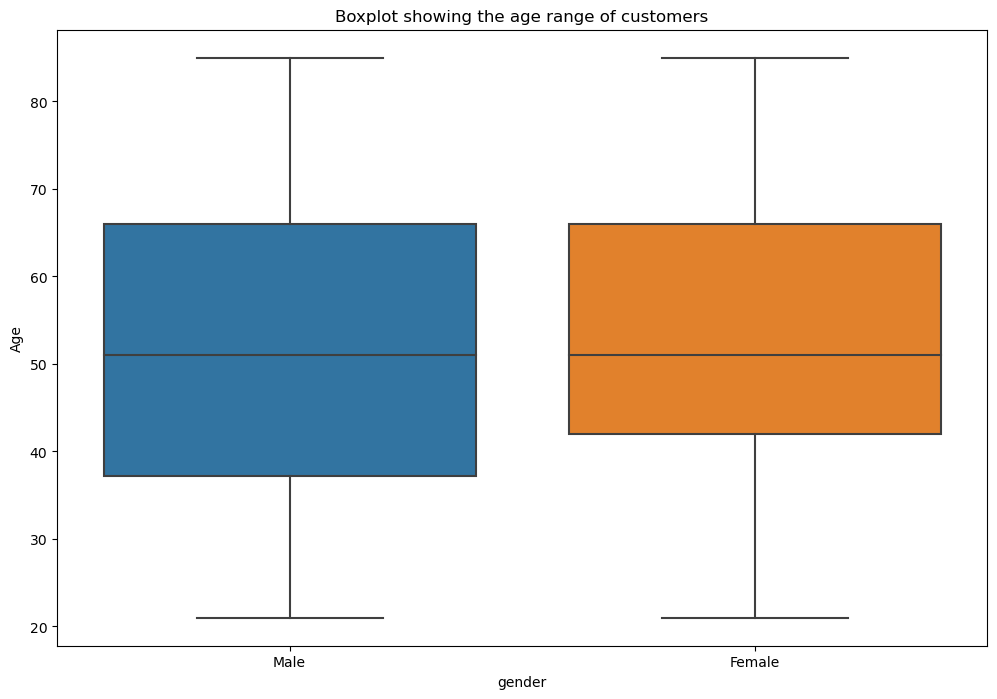

In [66]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df2['gender'], y = df2['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_new.png')
plt.show()

In [67]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('./current_customers.xlsx', sheet_name='123', index=False)
df2.to_excel('./target_new_customers.xlsx', sheet_name='4', index=False)